In [1]:
ROOT_DIR ='/data/user/home/mhossai5/DPP-New2025'


fatal: destination path '/data/user/home/mhossai5/DPP-New2025/utils' already exists and is not an empty directory.


In [11]:
import os
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
tqdm.pandas()
df_external_set = pd.read_parquet(os.path.join(ROOT_DIR,'data/dpp4-ext-26-03-25-feat.parquet'))

In [21]:
import tensorflow as tf

@tf.keras.saving.register_keras_serializable()
class MLP(tf.keras.Model):
    """Model that returns logits."""
    def __init__(self, n_classes, units_values=[768, 384, 192], activation='relu', **kwargs):
        super(MLP, self).__init__(**kwargs)
        self.denses = [tf.keras.layers.Dense(uv, activation=activation) for uv in units_values]
        self.dense_class = tf.keras.layers.Dense(n_classes)
        self.dropout = tf.keras.layers.Dropout(0.25)

    def call(self, inputs, training=False):
        x = inputs
        for dense in self.denses:
            x = dense(x)
            x = self.dropout(x, training=training)
        return self.dense_class(x)

2025-05-06 02:47:06.998435: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-06 02:47:06.998499: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-06 02:47:06.999352: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-06 02:47:07.005636: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-06 02:47:18.427423: W tensorflow/compiler/tf2

In [22]:
model = MLP(2)
model.build([None,4608])
model.load_weights(f'{ROOT_DIR}/weights/DPP4_LTN_DNN_CDKextended-ECFP-ECFP_512-ECFP_2048_Weights.keras')

2025-05-06 02:47:35.937249: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [23]:
FEAT_NAME = [
    'CDKextended',
    'ECFP',
    'ECFP_512',
    'ECFP_2048',
]

In [24]:
import numpy as np
X = np.concatenate([np.vstack(df_external_set[col]) for col in FEAT_NAME],axis = 1)
y = df_external_set['target']

X = scaler.transform(X)

In [25]:
y_pred_prob = tf.nn.softmax(model.predict(X)).numpy()
y_pred = y_pred_prob.argmax(-1)

33/33 [==============================] - 0s 4ms/step


In [26]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    matthews_corrcoef,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report,
    auc,
    ConfusionMatrixDisplay,
)
import matplotlib.pyplot as plt

In [27]:
print(f"accuracy_score: {accuracy_score(y,y_pred)}")
print(f"roc_auc_score: {roc_auc_score(y,y_pred)}")
print(f"matthews_corrcoef: {matthews_corrcoef(y,y_pred)}")
print(f"F1 Score: {f1_score(y,y_pred,average='macro')}")


accuracy_score: 0.9578947368421052
roc_auc_score: 0.9564954128440367
matthews_corrcoef: 0.9171467547434217
F1 Score: 0.9576648841354725


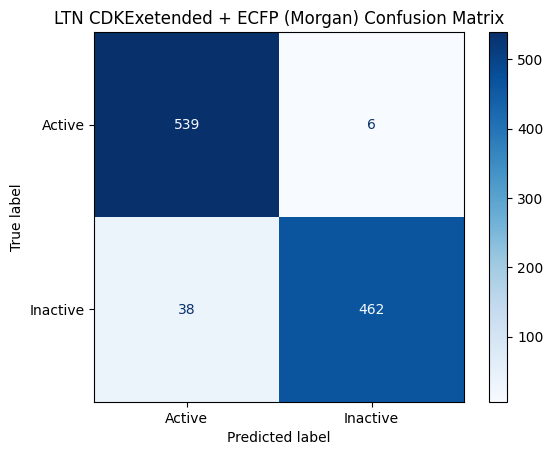

In [28]:
cm = confusion_matrix(y, y_pred)

# 6. Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = ['Active', 'Inactive'])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"LTN CDKExetended + ECFP (Morgan) Confusion Matrix")
plt.show()